# Notebook 4
**Project:" Intra-Regional Migration and Transportation in New York Metro Area"**

***Due to the large data our team is working with, there are a total of <font color='red'>four</font> notebooks submitted for this midterm <font color='red'>(two from each team member)</font>***

***I also outlined the notebook into the Table of Content***

# Research Questions
- **Q1: On the county level, did housing costs change between 2014 and 2018? If so, what county experience increase in housing price? And what county experience decrease in housing price?**

    - **Expected Exploration:**
    
        -  We expect to explore and analyze the housing value data in New York Metro Region on the county level in 2014 and 2018. We expect to compare the housing value between the two years on the county level to find out changes in housing value. We hope to capture the geographic shift of housing value if there was any change.  
        
        - We expect to create maps and charts to visually represent our findings of housing value comparison in 2014 and 2018.
        
- **Q2: On the county level, did housing affordability change bewteen 2014 and 2018? If so, what county experience increase in housing afforability? And what county experience decrease in housing affordability?**
    - **Expected Exploration:**
        - We expect to capture changes of housing affordability in the New York Metro Area on the county level between 2014 and 2018 by exploring and analyzing the housing affordability data. 
        - We expect to create maps and charts to visually represent our findings of housing affordability comparison in 2014 and 2018.

- **Purpose of this notebook:** I conducted data exploration and analysis of the New York Metro Area housing affordability and value data in 2014 and 2018. I used the ACS 5-year data from 2010 to 2014, and from 2014 to 2018. I created bar graphs with plotly.express to compare housing values and affordability in counties across NYMA between 2014 and 2018.

# Data sources

1. 2010-2014 5-Years ACS: https://www.census.gov/acs/www/data/data-tables-and-tools/data-profiles/2014/
2. 2014-2018 5-Years ACS:
https://www.census.gov/acs/www/data/data-tables-and-tools/data-profiles/2018/


# Importing libraries

In [1]:
#import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

# Data Exploration of Housing Affordability in 2014 and 2018

## Data exploration of 2014 housing affordability data

In [66]:
#use .read_csv command to import 2014 ACS survey housing affordability data
hao2014 = pd.read_csv('hao2014.csv')

In [67]:
#look at the frist 5 rows of the dataset
hao2014.head()

GEO_ID                            NAME   FIPS  \
0              id            Geographic Area Name   FIPS   
1  0500000US09001   Fairfield County, Connecticut   9001   
2  0500000US09005  Litchfield County, Connecticut   9005   
3  0500000US09009   New Haven County, Connecticut   9009   
4  0500000US34003       Bergen County, New Jersey  34003   

                              DP04_0079E         DP04_0080E  \
0  Estimate!!VALUE!!Owner-occupied units  ooh value<$50,000   
1                                 228331               4664   
2                                  58127               1248   
3                                 206556               5668   
4                                 217432               4207   

          DP04_0080PE                    DP04_0081E  \
0  %ooh value<$50,000  ooh value $50,000 to $99,999   
1                   2                          4247   
2                 2.1                          1696   
3                 2.7                          8206   
4                 1.9                          1989   

                     DP04_0081PE                      DP04_0082E  \
0  %ooh value $50,000 to $99,999  ooh value $100,000 to $149,999   
1                            1.9                            7431   
2                            2.9                            5991   
3                              4                           21721   
4                            0.9                            3260   

                       DP04_0082PE                      DP04_0083E  \
0  %ooh value $100,000 to $149,999  ooh value $150,000 to $199,999   
1                              3.3                           14232   
2                             10.3                           10115   
3                             10.5                           34629   
4                              1.5                            5135   

                        DP04_0083PE                      DP04_0084E  \
0  % ooh value $150,000 to $199,999  ooh value $200,000 to $299,999   
1                               6.2                           35819   
2                              17.4                           16557   
3                              16.8                           62070   
4                               2.4                           22246   

                       DP04_0084PE                      DP04_0085E  \
0  %ooh value $200,000 to $299,999  ooh value $300,000 to $499,999   
1                             15.7                           69761   
2                             28.5                           14794   
3                               30                           54897   
4                             10.2                           97576   

                       DP04_0085PE                      DP04_0086E  \
0  %ooh value $300,000 to $499,999  ooh value $500,000 to $999,999   
1                             30.6                           60739   
2                             25.5                            5961   
3                             26.6                           16510   
4                             44.9                           68725   

                       DP04_0086PE                    DP04_0087E  \
0  %ooh value $500,000 to $999,999  ooh value $1,000,000 or more   
1                             26.6                         31438   
2                             10.3                          1765   
3                                8                          2855   
4                             31.6                         14294   

                      DP04_0087PE                  DP04_0088E  \
0  % ooh value $1,000,000 or more  ooh value median (dollars)   
1                            13.8                      422400   
2                               3                      259800   
3                             1.4                      250400   
4                             6.6                      443500   

                                        D

In [4]:
#drop the first row (row 0)
hao2014 = hao2014.drop([0])

In [5]:
#check datatypes and columns
hao2014.dtypes

GEO_ID         object
NAME           object
FIPS           object
DP04_0079E     object
DP04_0080E     object
                ...  
DP04_0139E     object
DP04_0139PE    object
DP04_0140E     object
DP04_0140PE    object
DP04_0141E     object
Length: 116, dtype: object

In [6]:
#convert FIPS from object to integer so that I can merge the 2014 housing affordability dataframe with county boundary dataframe
hao2014['FIPS'] = hao2014['FIPS'].astype(str).astype(int)
hao2014.dtypes

GEO_ID         object
NAME           object
FIPS            int64
DP04_0079E     object
DP04_0080E     object
                ...  
DP04_0139E     object
DP04_0139PE    object
DP04_0140E     object
DP04_0140PE    object
DP04_0141E     object
Length: 116, dtype: object

## Data exploration of 2018 housing afforability data

In [7]:
#import 2018 ACS survey housing affordability data
hao2018 = pd.read_csv('hao2018.csv')

In [8]:
#looking at the first 5 rows of the dataframe
hao2018.head()

GEO_ID                            NAME   FIPS  \
0              id            Geographic Area Name   FIPS   
1  0500000US09001   Fairfield County, Connecticut   9001   
2  0500000US09005  Litchfield County, Connecticut   9005   
3  0500000US09009   New Haven County, Connecticut   9009   
4  0500000US34003       Bergen County, New Jersey  34003   

                              DP04_0080E         DP04_0081E  \
0  Estimate!!VALUE!!Owner-occupied units  ooh value<$50,000   
1                                 229169               4667   
2                                  57079               1214   
3                                 204295               4853   
4                                 217881               3109   

          DP04_0081PE                    DP04_0082E  \
0  %ooh value<$50,000  ooh value $50,000 to $99,999   
1                   2                          4269   
2                 2.1                          2103   
3                 2.4                         10039   
4                 1.4                          1961   

                     DP04_0082PE                      DP04_0083E  \
0  %ooh value $50,000 to $99,999  ooh value $100,000 to $149,999   
1                            1.9                            7458   
2                            3.7                            7068   
3                            4.9                           22849   
4                            0.9                            3082   

                       DP04_0083PE  ...                   DP04_0138PE  \
0  %ooh value $100,000 to $149,999  ...  % GRAPI 15.0 to 19.9 percent   
1                              3.3  ...                          10.7   
2                             12.4  ...                          10.8   
3                             11.2  ...                          11.1   
4                              1.4  ...                          13.1   

                   DP04_0139E                   DP04_0139PE  \
0  GRAPI 20.0 to 24.9 percent  % GRAPI 20.0 to 24.9 percent   
1                       12366                          11.7   
2                        2207                          14.1   
3                       14309                          12.3   
4                       14784                            13   

                   DP04_0140E                  DP04_0140PE  \
0  GRAPI 25.0 to 29.9 percent  %GRAPI 20.0 to 24.9 percent   
1                       11064                         10.5   
2                        2089                         13.4   
3                       14755                         12.6   
4                       13417                         11.8   

                   DP04_0141E                   DP04_0141PE  \
0  GRAPI 30.0 to 34.9 percent  % GRAPI 30.0 to 34.9 percent   
1                        9455                             9   
2                        1307                           8.4   
3                       10224                           8.8   
4                        9291                           8.2   

             DP04_0142E             DP04_0142PE          DP04_0143E  
0  GRAPI > 35.0 percent  % GRAPI > 35.0 percent  GRAPI Not computed  
1                 48610                    46.2                6071  
2                  6312                    40.3                1263  
3                 52137                    44.7                8834  
4                 45664                    40.3                6981  

[5 rows x 112 columns]

In [9]:
#drop the first row (row 0)
hao2018 = hao2018.drop([0])

In [10]:
#check datatypes
hao2018.dtypes

GEO_ID         object
NAME           object
FIPS           object
DP04_0080E     object
DP04_0081E     object
                ...  
DP04_0141E     object
DP04_0141PE    object
DP04_0142E     object
DP04_0142PE    object
DP04_0143E     object
Length: 112, dtype: object

In [11]:
#convert FIPS from object to integer so that I can merge the 2018 housing affordability dataframe with county boundary dataframe
hao2018['FIPS'] = hao2018['FIPS'].astype(str).astype(int)
hao2018.dtypes

GEO_ID         object
NAME           object
FIPS            int64
DP04_0080E     object
DP04_0081E     object
                ...  
DP04_0141E     object
DP04_0141PE    object
DP04_0142E     object
DP04_0142PE    object
DP04_0143E     object
Length: 112, dtype: object

## Data analysis of the housing affordability data in 2014 and 2018

In [28]:
#import county boundary data set
tracts=gpd.read_file('NYMRcb/county.shp')
tracts.head()

cartodb_id statefp countyfp  geoid                            name  \
0           1      09      001  09001   Fairfield County, Connecticut   
1          10      34      025  34025     Monmouth County, New Jersey   
2          25      36      081  36081         Queens County, New York   
3           2      09      005  09005  Litchfield County, Connecticut   
4          19      36      027  36027       Dutchess County, New York   

  subregid     atotal      aland  pop_10e  pop_10m  ...  cr_oth_e  \
0       CT  836.91795  624.96958   916829        0  ...       344   
1      ONJ  665.31546  468.40775   630380        0  ...         0   
2      NYC  178.03032  108.76805  2230722        0  ...      9887   
3       CT  944.55528  920.56844   189927        0  ...         0   
4      MHV  825.34308  795.63519   297488        0  ...        77   

      cr_oth_m    cr_oth_c  cr_hom_e     cr_hom_m  cr_hom_c  iscommap  \
0   363.225722   64.187765         0     0.000000  0.000000         0   
1     0.000000    0.000000         0     0.000000  0.000000         0   
2  1864.166774   11.461840     35072  3689.568791  6.395127         0   
3     0.000000    0.000000         0     0.000000  0.000000         0   
4   132.008047  104.218251         0     0.000000  0.000000         0   

   iscomnycre  iscomnycwo                                           geometry  
0           1           1  MULTIPOLYGON (((-73.60428 41.01486, -73.60471 ...  
1           1           1  MULTIPOLYGON (((-73.99367 40.23651, -73.99377 ...  
2           1           1  MULTIPOLYGON (((-73.83039 40.60801, -73.83033 ...  
3           1           1  POLYGON ((-72.98325 41.63960, -73.00315 41.629...  
4           1           1  POLYGON ((-73.48731 42.04964, -73.48731 42.049...  

[5 rows x 222 columns]

In [46]:
#convert the data type of columns in 2018 housing affordability dataframe from object to integers for mapping
tracts2018["DP04_0111E_y"] =tracts2018["DP04_0111E_y"].astype(str).astype(int)
tracts2018["DP04_0111PE_y"] =tracts2018["DP04_0111PE_y"].astype(float).astype(int)
tracts2018["DP04_0112E_y"] =tracts2018["DP04_0112E_y"].astype(str).astype(int)
tracts2018["DP04_0112PE_y"] =tracts2018["DP04_0112PE_y"].astype(float).astype(int)
tracts2018["DP04_0113E_y"] =tracts2018["DP04_0113E_y"].astype(float).astype(int)
tracts2018["DP04_0113PE_y"] =tracts2018["DP04_0113PE_y"].astype(float).astype(int)
tracts2018["DP04_0114E_y"] =tracts2018["DP04_0114E_y"].astype(float).astype(int)
tracts2018["DP04_0114PE"] =tracts2018["DP04_0114PE"].astype(float).astype(int)
tracts2018["DP04_0115E_y"] =tracts2018["DP04_0115E_y"].astype(float).astype(int)
tracts2018["DP04_0115PE"] =tracts2018["DP04_0115PE"].astype(float).astype(int)
tracts2018["DP04_0116E_y"] =tracts2018["DP04_0116E_y"].astype(float).astype(int)

### Mapping 2014 and 2018 housing affordability in NYMA

Text(0.5, 0.98, '2018: Selected Monthly Owner Costs as A Percentage of Household Income-housing units with mortgage')

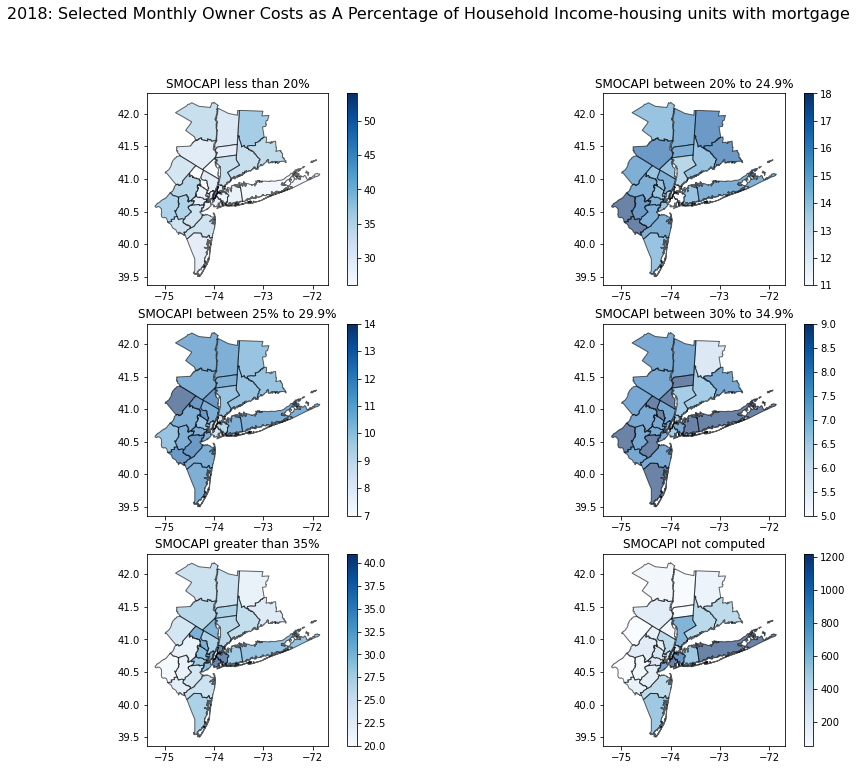

In [47]:
#plot 2018 SMOCAPI across counties in the NYMA region on the map 

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
(ax1, ax2), (ax3, ax4),(ax5, ax6) = axs


tracts2018.plot(
    figsize=(15, 12),
    cmap='Blues',
    column='DP04_0111PE_y',
    legend = True,
    edgecolor="Black",
    alpha=0.6,
    ax=ax1,
)
ax1.set_title("SMOCAPI less than 20%")

tracts2018.plot(
    figsize=(15, 12),
    cmap='Blues',
    column='DP04_0112PE_y',
    legend = True,
    edgecolor="Black",
    alpha=0.6,
    ax=ax2,
)
ax2.set_title("SMOCAPI between 20% to 24.9%")

tracts2018.plot(
    figsize=(15, 12),
    cmap='Blues',
    column='DP04_0113PE_y',
    legend = True,
    edgecolor="Black",
    alpha=0.6,
    ax=ax3,
)
ax3.set_title("SMOCAPI between 25% to 29.9%")

tracts2018.plot(
    figsize=(15, 12),
    cmap='Blues',
    column='DP04_0114PE',
    legend = True,
    ax=ax4,
    edgecolor="Black",
    alpha=0.6
)
ax4.set_title("SMOCAPI between 30% to 34.9%")

tracts2018.plot(
    figsize=(15, 12),
    cmap='Blues',
    column='DP04_0115PE',
    legend = True,
    ax=ax5,
    edgecolor="Black",
    alpha=0.6
)
ax5.set_title("SMOCAPI greater than 35%")

tracts2018.plot(
    figsize=(15, 12),
    cmap='Blues',
    column='DP04_0116E_y',
    legend = True,
    ax=ax6,
    edgecolor="Black",
    alpha=0.6
)
ax6.set_title("SMOCAPI not computed")


fig.suptitle('2018: Selected Monthly Owner Costs as A Percentage of Household Income-housing units with mortgage', fontsize=16)

In [45]:
#merge the county boundary dataframe wiht 2018 housing affordability dataframe on FIPS 
tracts2018=tracts.merge(hao2018,on="FIPS")
pd.set_option('display.max_columns', None)
tracts2018.head()

cartodb_id statefp countyfp  geoid                            name  \
0           1      09      001  09001   Fairfield County, Connecticut   
1          10      34      025  34025     Monmouth County, New Jersey   
2          25      36      081  36081         Queens County, New York   
3           2      09      005  09005  Litchfield County, Connecticut   
4          19      36      027  36027       Dutchess County, New York   

  subregid     atotal      aland  pop_10e  pop_10m  pop_10c  pop_19e  pop_19m  \
0       CT  836.91795  624.96958   916829        0        0   943332        0   
1      ONJ  665.31546  468.40775   630380        0        0   618795        0   
2      NYC  178.03032  108.76805  2230722        0        0  2253858        0   
3       CT  944.55528  920.56844   189927        0        0   180333        0   
4      MHV  825.34308  795.63519   297488        0        0   294218        0   

   pop_19c  pop_1019e  pop_1019m  pop_1019c  popp_1019e  popp_1019m  \
0        0      26503          0          0    0.028907           0   
1        0     -11585          0          0   -0.018378           0   
2        0      23136          0          0    0.010372           0   
3        0      -9594          0          0   -0.050514           0   
4        0      -3270          0          0   -0.010992           0   

   popp_1019c      popd_19e  popd_19m  popd_19c  popfb_18e  popfb_18m  \
0           0   1509.404666         0         0     205009       3336   
1           0   1321.060550         0         0      83067       2180   
2           0  20721.691710         0         0    1087233       6776   
3           0    195.893094         0         0      14451        920   
4           0    369.790079         0         0      33754       1315   

   popfb_18c  popfbp_18e  popfbp_18m  popfbp_18c   lf_10e  lf_10m    lf_10c  \
0   0.989207    0.217091    0.003533    0.989207   475682    2304  0.294442   
1   1.595372    0.133251    0.003497    1.595372   332855    1979  0.361431   
2   0.378865    0.473016    0.002948    0.378865  1165731    4077  0.212606   
3   3.870116    0.078954    0.005026    3.870116   107531     846  0.478267   
4   2.368288    0.114851    0.004474    2.368288   153872    1532  0.605248   

    lf_18e  lf_18m    lf_18c  lf_1018e     lf_1018m    lf_1018c  lfpw_10e  \
0   511280    2316  0.275368     35598  3266.844349    5.578751    320032   
1   333518    2003  0.365086       663  2815.750344  258.175315    222930   
2  1206521    3951  0.199070     40790  5677.352376    8.461089    829712   
3   102813     932  0.551064     -4718  1258.705684   16.218114     69780   
4   153137    1580  0.627207      -735  2200.778044  182.021632    101391   

      lfpw_10m  lfpw_10c  lfpw_18e     lfpw_18m  lfpw_18c  lfpw_1018e  \
0  1467.318302  0.278718    313972  1492.376628  0.288949       -6060   
1  1127.957003  0.307580    201220  1167.803922  0.352803      -21710   
2  2796.991598  0.204926    842354  2634.612875  0.190132       12642   
3   643.345941  0.560464     58280   612.175628  0.638544      -11500   
4   855.871486  0.513149     91997   881.948411  0.582779       -9394   

    lfpw_1018m  lfpw_1018c  lf65_10e     lf65_10m  lf65_10c  lf65_18e  \
0  2092.895363   20.994667     25310   849.463360  2.040265     35348   
1  1623.592621    4.546229     15308   722.431312  2.868879     23088   
2  3842.440240   18.476744     39144  1212.634735  1.883211     55023   
3   888.061372    4.694391      5955   390.621300  3.987569      8350   
4  1228.962571    7.952839      6626   483.381837  4.434789      9414   

      lf65_18m  lf65_18c  lf65_1018e   lf65_1018m  lf65_1018c  hou_00e  \
0   985.406515  1.694668       10038  1301.004996    7.878905   339466   
1   870.955223  2.293209        7780  1131.578543    8.841770   240884   
2  1483.098109  1.638550       15879  1915.740849    7.334115   817250   
3   465.733830  3.390669        2395   607.859359   15.428784    79267   
4   488.936601  3.157275 

In [46]:
#convert the data type of columns in 2018 housing affordability dataframe from object to integers for mapping
tracts2018["DP04_0111E_y"] =tracts2018["DP04_0111E_y"].astype(str).astype(int)
tracts2018["DP04_0111PE_y"] =tracts2018["DP04_0111PE_y"].astype(float).astype(int)
tracts2018["DP04_0112E_y"] =tracts2018["DP04_0112E_y"].astype(str).astype(int)
tracts2018["DP04_0112PE_y"] =tracts2018["DP04_0112PE_y"].astype(float).astype(int)
tracts2018["DP04_0113E_y"] =tracts2018["DP04_0113E_y"].astype(float).astype(int)
tracts2018["DP04_0113PE_y"] =tracts2018["DP04_0113PE_y"].astype(float).astype(int)
tracts2018["DP04_0114E_y"] =tracts2018["DP04_0114E_y"].astype(float).astype(int)
tracts2018["DP04_0114PE"] =tracts2018["DP04_0114PE"].astype(float).astype(int)
tracts2018["DP04_0115E_y"] =tracts2018["DP04_0115E_y"].astype(float).astype(int)
tracts2018["DP04_0115PE"] =tracts2018["DP04_0115PE"].astype(float).astype(int)
tracts2018["DP04_0116E_y"] =tracts2018["DP04_0116E_y"].astype(float).astype(int)

Text(0.5, 0.98, '2014: Selected Monthly Owner Costs as A Percentage of Household Income-housing units with mortgage')

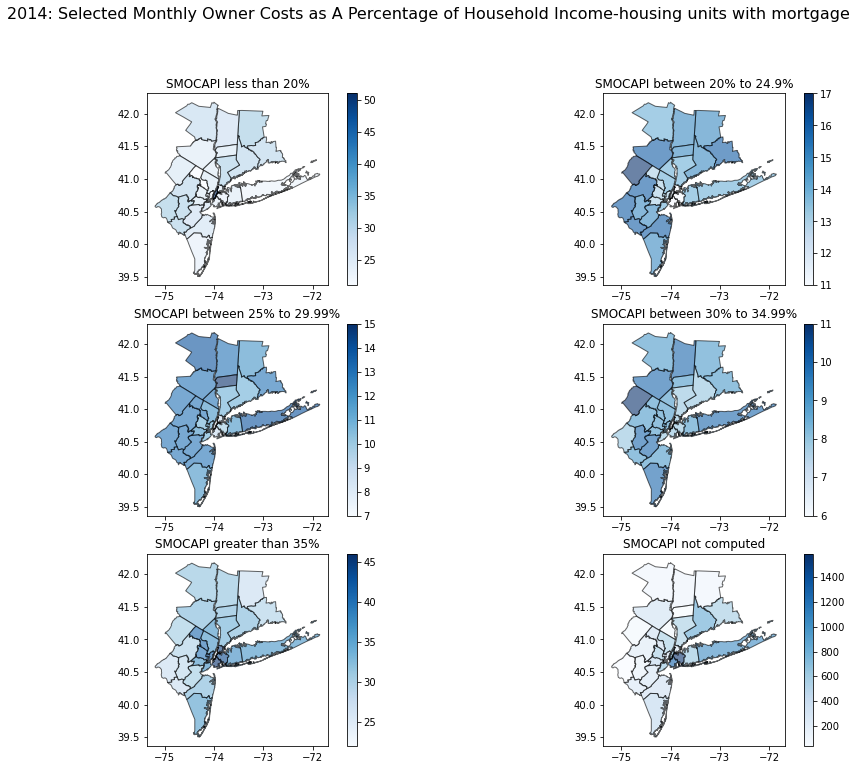

In [44]:
#plot 2014 SMOCAPI across counties in the NYMA region on the map 
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12)) #3 rows and 2 columns
(ax1, ax2), (ax3, ax4),(ax5, ax6) = axs

tracts.plot(
    figsize=(15,12),
    cmap='Blues',
    ax=ax1,
    column= 'DP04_0109PE',
    legend = True,
    edgecolor="Black",
    alpha=0.6
    )
ax1.set_title("SMOCAPI less than 20%")

tracts.plot(
    figsize=(15, 12),
     ax=ax2,
    cmap='Blues',
    column='DP04_0110PE',
    legend = True,
    edgecolor="Black",
    alpha=0.6
    )              
ax2.set_title("SMOCAPI between 20% to 24.9%")

tracts.plot(
    figsize=(15, 12),
    cmap='Blues',
    column='DP04_0111PE',
    legend = True,
    ax=ax3,
    edgecolor="Black",
    alpha=0.6
)
ax3.set_title("SMOCAPI between 25% to 29.99%")

tracts.plot(
    figsize=(15, 12),
    cmap='Blues',
    column='DP04_0112PE',
    legend = True,
    ax=ax4,
    edgecolor="Black",
    alpha=0.6
)
ax4.set_title("SMOCAPI between 30% to 34.99%")

tracts.plot(
    figsize=(15, 12),
    cmap='Blues',
    column='DP04_0113PE',
    legend = True,
    ax=ax5,
    edgecolor="Black",
    alpha=0.6
)
ax5.set_title("SMOCAPI greater than 35%")

tracts.plot(
    figsize=(15, 12),
    cmap='Blues',
    column='DP04_0114E',
    legend = True,
    ax=ax6,
     edgecolor="Black",
    alpha=0.6
)
ax6.set_title("SMOCAPI not computed")


fig.suptitle('2014: Selected Monthly Owner Costs as A Percentage of Household Income-housing units with mortgage', fontsize=16)

### Comparing housing affordability in 2014 and 2018 with Plotly.Express

In [48]:
#US Census Bureau defined housing units with less than 20% SMOCAPI as affordable. 
#create a new dataframe "SMOCAPI2018 by sorting the 2018housing units with less than 20% SMOCAPI
SMOCAPI2018=tracts2018.sort_values(by=['DP04_0111PE_y'], ascending=False)
SMOCAPI2018

cartodb_id statefp countyfp  geoid                            name  \
25          22      36      061  36061       New York County, New York   
3            2      09      005  09005  Litchfield County, Connecticut   
27           7      34      019  34019    Hunterdon County, New Jersey   
23          14      34      035  34035     Somerset County, New Jersey   
14          11      34      027  34027       Morris County, New Jersey   
7            3      09      009  09009   New Haven County, Connecticut   
21          31      36      119  36119    Westchester County, New York   
0            1      09      001  09001   Fairfield County, Connecticut   
28          30      36      111  36111         Ulster County, New York   
1           10      34      025  34025     Monmouth County, New Jersey   
26           8      34      021  34021       Mercer County, New Jersey   
16           9      34      023  34023    Middlesex County, New Jersey   
22          15      34      037  34037       Sussex County, New Jersey   
4           19      36      027  36027       Dutchess County, New York   
18           4      34      003  34003       Bergen County, New Jersey   
10          23      36      071  36071         Orange County, New York   
15          18      36      005  36005          Bronx County, New York   
19           6      34      017  34017       Hudson County, New Jersey   
12          12      34      029  34029        Ocean County, New Jersey   
11          16      34      039  34039        Union County, New Jersey   
8           24      36      079  36079         Putnam County, New York   
13           5      34      013  34013        Essex County, New Jersey   
17          20      36      047  36047          Kings County, New York   
20          26      36      085  36085       Richmond County, New York   
6           21      36      059  36059         Nassau County, New York   
2           25      36      081  36081         Queens County, New York   
9           28      36      103  36103        Suffolk County, New York   
5           27      36      087  36087       Rockland County, New York   
24          13      34      031  34031      Passaic County, New Jersey   

   subregid      atotal       aland  pop_10e  pop_10m  pop_10c  pop_19e  \
25      NYC    33.68056    22.65581  1585873        0        0  1628706   
3        CT   944.55528   920.56844   189927        0        0   180333   
27      ONJ   437.44525   427.83451   128349        0        0   124371   
23      INJ   304.81309   301.77125   323444        0        0   328934   
14      INJ   481.65515   460.30071   492276        0        0   491845   
7        CT   862.06191   604.49891   862477        0        0   854757   
21      LHV   499.99194   430.51583   949113        0        0   967506   
0        CT   836.91795   624.96958   916829        0        0   943332   
28      MHV  1160.75360  1124.23449   182493        0        0   177573   
1       ONJ   665.31546   468.40775   630380        0        0   618795   
26      ONJ   228.88741   224.56838   366513        0        0   367430   
16      INJ   322.81866   309.04777   809858        0        0   825062   
22      ONJ   534.82526   518.04179   149265        0        0   140488   
4       MHV   825.34308   795.63519   297488        0        0   294218   
18      INJ   246.67227   233.05341   905116        0        0   932202   
10      MHV   838.64120   811.69840   372813        0        0   384940   
15      NYC    57.37188    42.05062  1385108        0        0  1418207   
19      INJ    62.36689    46.16745   634266        0        0   672391   
12      ONJ   915.39610   628.84170   576567        0        0   607186   
11      INJ   105.40494   102.86728   536499        0        0   556341   
8       LHV   246.24955   230.31145    99710        0        0    98320   
13      INJ   129.63011   126.22569   783969        0        0   798975   
17      NYC    96.82205    69.81256  2504700        0     

In [59]:
#plot it
fig2=px.bar(
     SMOCAPI2018,
      x='name',
      y='DP04_0111PE_y',
    color='DP04_0111PE_y',
    labels={"DP04_0111PE_y": "Percent of housing units with SMOCAPI<20%", #change labels of x and y axis, and legend
        "name": "Counties",
        "DP04_0111PE_y": "% units with SMOCAPI<20%"
                 }
)
fig2.update_layout(xaxis_tickangle=-45,title={
        'text': "Counties with highst percentage of housing units with SMOCAPI <20% in 2018", #add title
        'y':1,#change position of the title
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

In [51]:
#create a new dataframe "SMOCAPI2014" by sorting the 2014 housing units with less than 20% SMOCAPI
SMOCAPI2014=tracts.sort_values(by=['DP04_0109PE'], ascending=False)
SMOCAPI2014

cartodb_id statefp countyfp  geoid                            name  \
25          22      36      061  36061       New York County, New York   
27           7      34      019  34019    Hunterdon County, New Jersey   
3            2      09      005  09005  Litchfield County, Connecticut   
21          31      36      119  36119    Westchester County, New York   
26           8      34      021  34021       Mercer County, New Jersey   
23          14      34      035  34035     Somerset County, New Jersey   
0            1      09      001  09001   Fairfield County, Connecticut   
14          11      34      027  34027       Morris County, New Jersey   
7            3      09      009  09009   New Haven County, Connecticut   
28          30      36      111  36111         Ulster County, New York   
16           9      34      023  34023    Middlesex County, New Jersey   
4           19      36      027  36027       Dutchess County, New York   
20          26      36      085  36085       Richmond County, New York   
1           10      34      025  34025     Monmouth County, New Jersey   
22          15      34      037  34037       Sussex County, New Jersey   
8           24      36      079  36079         Putnam County, New York   
11          16      34      039  34039        Union County, New Jersey   
18           4      34      003  34003       Bergen County, New Jersey   
15          18      36      005  36005          Bronx County, New York   
13           5      34      013  34013        Essex County, New Jersey   
6           21      36      059  36059         Nassau County, New York   
5           27      36      087  36087       Rockland County, New York   
10          23      36      071  36071         Orange County, New York   
17          20      36      047  36047          Kings County, New York   
12          12      34      029  34029        Ocean County, New Jersey   
2           25      36      081  36081         Queens County, New York   
9           28      36      103  36103        Suffolk County, New York   
19           6      34      017  34017       Hudson County, New Jersey   
24          13      34      031  34031      Passaic County, New Jersey   

   subregid      atotal       aland  pop_10e  pop_10m  pop_10c  pop_19e  \
25      NYC    33.68056    22.65581  1585873        0        0  1628706   
27      ONJ   437.44525   427.83451   128349        0        0   124371   
3        CT   944.55528   920.56844   189927        0        0   180333   
21      LHV   499.99194   430.51583   949113        0        0   967506   
26      ONJ   228.88741   224.56838   366513        0        0   367430   
23      INJ   304.81309   301.77125   323444        0        0   328934   
0        CT   836.91795   624.96958   916829        0        0   943332   
14      INJ   481.65515   460.30071   492276        0        0   491845   
7        CT   862.06191   604.49891   862477        0        0   854757   
28      MHV  1160.75360  1124.23449   182493        0        0   177573   
16      INJ   322.81866   309.04777   809858        0        0   825062   
4       MHV   825.34308   795.63519   297488        0        0   294218   
20      NYC   102.29181    58.17784   468730        0        0   476143   
1       ONJ   665.31546   468.40775   630380        0        0   618795   
22      ONJ   534.82526   518.04179   149265        0        0   140488   
8       LHV   246.24955   230.31145    99710        0        0    98320   
11      INJ   105.40494   102.86728   536499        0        0   556341   
18      INJ   246.67227   233.05341   905116        0        0   932202   
15      NYC    57.37188    42.05062  1385108        0        0  1418207   
13      INJ   129.63011   126.22569   783969        0        0   798975   
6        LI   453.47308   284.80991  1339532        0        0  1356924   
5       LHV   199.33864   173.50381   311687        0        0   325789   
10      MHV   838.64120   811.69840   372813        0     

In [52]:
#plot it
fig2=px.bar(
     SMOCAPI2014,
      x='name',
      y='DP04_0109PE',
    color='DP04_0109PE',
    labels={"DP04_0109PE": "Percent of housing units with SMOCAPI<20%", #change labels of x and y axis, and legend
        "name": "Counties",
        "DP04_0109PE": "% units with SMOCAPI<20%"
                 }
)
fig2.update_layout(xaxis_tickangle=-45,title={
        'text': "Counties with highst percentage of housing units with SMOCAPI <20% in 2014", #add title
        'y':1,#change position of the title
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)

In [53]:
#I want to measure the change between 2014 and 2018 housing units with SMOCAPI<20% across counties in NYMA
tracts2018["change"]=SMOCAPI2018['DP04_0111PE_y']-SMOCAPI2014['DP04_0109PE'] #create new category "change" and calculate it by dividing. 
tracts2018
tracts2018=tracts2018.sort_values(by=['change'], ascending=False)
tracts2018

cartodb_id statefp countyfp  geoid                            name  \
14          11      34      027  34027       Morris County, New Jersey   
3            2      09      005  09005  Litchfield County, Connecticut   
23          14      34      035  34035     Somerset County, New Jersey   
22          15      34      037  34037       Sussex County, New Jersey   
19           6      34      017  34017       Hudson County, New Jersey   
1           10      34      025  34025     Monmouth County, New Jersey   
10          23      36      071  36071         Orange County, New York   
27           7      34      019  34019    Hunterdon County, New Jersey   
16           9      34      023  34023    Middlesex County, New Jersey   
12          12      34      029  34029        Ocean County, New Jersey   
28          30      36      111  36111         Ulster County, New York   
7            3      09      009  09009   New Haven County, Connecticut   
0            1      09      001  09001   Fairfield County, Connecticut   
15          18      36      005  36005          Bronx County, New York   
17          20      36      047  36047          Kings County, New York   
18           4      34      003  34003       Bergen County, New Jersey   
21          31      36      119  36119    Westchester County, New York   
2           25      36      081  36081         Queens County, New York   
24          13      34      031  34031      Passaic County, New Jersey   
4           19      36      027  36027       Dutchess County, New York   
11          16      34      039  34039        Union County, New Jersey   
9           28      36      103  36103        Suffolk County, New York   
6           21      36      059  36059         Nassau County, New York   
8           24      36      079  36079         Putnam County, New York   
13           5      34      013  34013        Essex County, New Jersey   
26           8      34      021  34021       Mercer County, New Jersey   
25          22      36      061  36061       New York County, New York   
20          26      36      085  36085       Richmond County, New York   
5           27      36      087  36087       Rockland County, New York   

   subregid      atotal       aland  pop_10e  pop_10m  pop_10c  pop_19e  \
14      INJ   481.65515   460.30071   492276        0        0   491845   
3        CT   944.55528   920.56844   189927        0        0   180333   
23      INJ   304.81309   301.77125   323444        0        0   328934   
22      ONJ   534.82526   518.04179   149265        0        0   140488   
19      INJ    62.36689    46.16745   634266        0        0   672391   
1       ONJ   665.31546   468.40775   630380        0        0   618795   
10      MHV   838.64120   811.69840   372813        0        0   384940   
27      ONJ   437.44525   427.83451   128349        0        0   124371   
16      INJ   322.81866   309.04777   809858        0        0   825062   
12      ONJ   915.39610   628.84170   576567        0        0   607186   
28      MHV  1160.75360  1124.23449   182493        0        0   177573   
7        CT   862.06191   604.49891   862477        0        0   854757   
0        CT   836.91795   624.96958   916829        0        0   943332   
15      NYC    57.37188    42.05062  1385108        0        0  1418207   
17      NYC    96.82205    69.81256  2504700        0        0  2559903   
18      INJ   246.67227   233.05341   905116        0        0   932202   
21      LHV   499.99194   430.51583   949113        0        0   967506   
2       NYC   178.03032   108.76805  2230722        0        0  2253858   
24      INJ   198.03717   185.67606   501226        0        0   501826   
4       MHV   825.34308   795.63519   297488        0        0   294218   
11      INJ   105.40494   102.86728   536499        0        0   556341   
9        LI  2373.12034   911.72148  1493350        0        0  1476601   
6        LI   453.47308   284.80991  1339532        0     

In [54]:
# Plot the change between the number of housing units with SMOCAPI<20% in 2014 and 2018 
fig3=px.bar(
     tracts2018,
      x='name',
      y='change',
    color='change'
)
fig3.update_layout(xaxis_tickangle=-45,title={
        'text': "Percent change of housing units with SMOCAPI <20% between 2014 and 2018", #add title
        'y':1,#change position of the title
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)

Text(0.5, 1.0, 'percent change of number of housing units with SMOCAPI<20%')

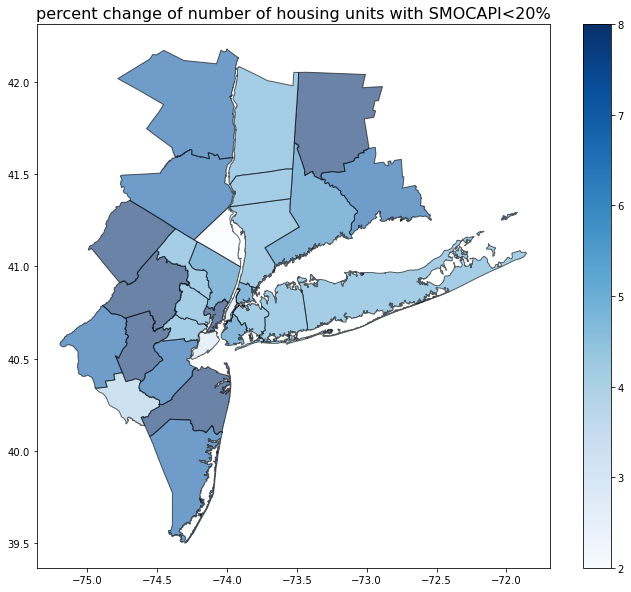

In [69]:
#plot it on the map
fig3=tracts2018.plot(figsize=(12,10),
    cmap='Blues',
    column='change',
    legend = True,
    edgecolor="Black",
    alpha=0.6)
    
plt.title('percent change of number of housing units with SMOCAPI<20%',fontsize=16)

## Conclusion

From the data exploration and analysis of housing affordability of owner occupied housing units with mortgage in NYMA, there is an overall increase in housing afforability in NYMA counties, ranging from two to eight percent. The highest increase is in counties further away from New York County (NYC), but also in Hudson County, which is located across from New York Conty. 

Next step of the affordability analysis will be focused on the relationship between migration, housing affordability, and transit density on the county level. 

# Data exploration and analysis of housing value in 2014 and 2018

## Data exploration

In [12]:
#importing 2014 and 2018 housing value data from ACS survey
value2014 = pd.read_csv('Book1.csv')

In [13]:
#looking at first 5 rows of the dataframe
value2014.head()

Value                            Name  count1  year1  count2  \
0  Less than $50k   Fairfield County, Connecticut    4664   2014    4667   
1  Less than $50k  Litchfield County, Connecticut    1248   2014    1214   
2  Less than $50k   New Haven County, Connecticut    5668   2014    4853   
3  Less than $50k       Bergen County, New Jersey    4207   2014    3109   
4  Less than $50k        Essex County, New Jersey    2951   2014    3318   

   year2   FIPS    change  
0   2018    901  0.000643  
1   2018    905 -0.027244  
2   2018    909 -0.143790  
3   2018  34003 -0.260994  
4   2018  34013  0.124365

In [14]:
#Check data types
value2014.dtypes

Value      object
Name       object
count1      int64
year1       int64
count2      int64
year2       int64
FIPS        int64
change    float64
dtype: object

In [15]:
list(value2014)

['Value', 'Name', 'count1', 'year1', 'count2', 'year2', 'FIPS', 'change']

In [16]:
#Use plotly.express to create stacked bar chart of housing values in 2014 across counties in NYMA
Count = value2014.query("Value == ['Less than $50,000','$50,000 to $99,999','$100,000 to $149,999','$150,000 to $199,999','$200,000 to $299,999','$300,000 to $499,999','$500,000 to $999,999','$1,000,000 or more']")
fig=px.bar(Count,
      x='Name',
      y='count1',
      color='Value',
      labels={"count1": "2014 Count", #change labels of x and y axis, and legend
              "Name": "Counties",
              "Value": "Housing Vaue"
                 })

fig.update_layout(xaxis_tickangle=-45,
      title={
        'text': "Housing value of Owner-Occupied Units with Mortgage in New York Metro Area",
        'y':1,#change position of the title
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict(
    orientation="h", #change the orientation of legend to horizontal
    yanchor="bottom",#change the position of the legend
    y=1.02,
    xanchor="right",
    x=.8))

In [17]:
#Use plotly.express to create stacked bar chart of housing values in 2018 across counties in NYMA
Count = value2014.query("Value == ['Less than $50,000','$50,000 to $99,999','$100,000 to $149,999','$150,000 to $199,999','$200,000 to $299,999','$300,000 to $499,999','$500,000 to $999,999','$1,000,000 or more']")
fig=px.bar(Count,
      x='Name',
      y='count2',
      color='Value',
      labels={"count2": "2018 Count", #change labels of x and y axis, and legend
        "Name": "Counties",
        "Value": "Housing Vaue"
                 })
fig.update_layout(xaxis_tickangle=-45,
      title={
        'text': "Housing value of Owner-Occupied Units with Mortgage in New York Metro Area", #add title
        'y':1,#change position of the title
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict( 
    orientation="h", #change the orientation of legend to horizontal
    yanchor="bottom", #change the position of the legend
    y=1.02,
    xanchor="right",
    x=.8))

## Data analysis

In [18]:
#I want to measure the change between 2014 and 2018 housing values across value categories and counties in NYMA
value2014["change"]=1-value2014["count1"] / value2014['count2'] #create new category "change" and calculate it by dividing. 
value2014

Value                            Name  count1  year1  \
0        Less than $50k   Fairfield County, Connecticut    4664   2014   
1        Less than $50k  Litchfield County, Connecticut    1248   2014   
2        Less than $50k   New Haven County, Connecticut    5668   2014   
3        Less than $50k       Bergen County, New Jersey    4207   2014   
4        Less than $50k        Essex County, New Jersey    2951   2014   
..                  ...                             ...     ...    ...   
243  $1,000,000 or more        Suffolk County, New York   16345   2014   
244  $1,000,000 or more         Ulster County, New York     654   2014   
245  $1,000,000 or more    Westchester County, New York   26146   2014   
246  $1,000,000 or more     Monroe County, Pennsylvania     234   2014   
247  $1,000,000 or more       Pike County, Pennsylvania     127   2014   

     count2  year2   FIPS    change  
0      4667   2018    901  0.000643  
1      1214   2018    905 -0.028007  
2      4853   2018    909 -0.167937  
3      3109   2018  34003 -0.353168  
4      3318   2018  34013  0.110609  
..      ...    ...    ...       ...  
243   17122   2018  36103  0.045380  
244     644   2018  36111 -0.015528  
245   30215   2018  36119  0.134668  
246     288   2018  42089  0.187500  
247     154   2018  42103  0.175325  

[248 rows x 8 columns]

In [19]:
#Group the data by counties and sort the change from high to low. 
value2014.groupby("Name").change.describe().sort_values(by=["max"], ascending=False)

count      mean       std       min       25%  \
Name                                                                            
Queens County, New York           8.0 -0.060666  0.307060 -0.335936 -0.204030   
Kings County, New York            8.0 -0.114528  0.318828 -0.549690 -0.289721   
New York County, New York         8.0  0.078289  0.236347 -0.231081 -0.040876   
Hudson County, New Jersey         8.0 -0.022560  0.289129 -0.467949 -0.178367   
Putnam County, New York           8.0  0.025068  0.214129 -0.385542 -0.034432   
Richmond County, New York         8.0 -0.145303  0.277094 -0.592530 -0.268459   
Bronx County, New York            8.0  0.020338  0.194725 -0.262523 -0.071438   
Orange County, New York           8.0  0.048049  0.130903 -0.132379 -0.044616   
Middlesex County, New Jersey      8.0 -0.053399  0.162053 -0.240747 -0.146051   
Sussex County, New Jersey         8.0 -0.003837  0.160242 -0.265269 -0.089668   
Hunterdon County, New Jersey      8.0 -0.042437  0.194861 -0.364238 -0.149707   
Union County, New Jersey          8.0 -0.008484  0.119621 -0.161146 -0.089204   
Ulster County, New York           8.0 -0.004265  0.114335 -0.170343 -0.068496   
Essex County, New Jersey          8.0  0.021700  0.108704 -0.112352 -0.051880   
Litchfield County, Connecticut    8.0  0.000274  0.110565 -0.116083 -0.058772   
Monroe County, Pennsylvania       8.0 -0.018964  0.187117 -0.287285 -0.139602   
Dutchess County, New York         8.0 -0.018469  0.134866 -0.241211 -0.075629   
New Haven County, Connecticut     8.0 -0.028158  0.119470 -0.195061 -0.075868   
Nassau County, New York           8.0 -0.075142  0.170222 -0.315291 -0.181699   
Pike County, Pennsylvania         8.0  0.057608  0.094271 -0.050357 -0.008075   
Ocean County, New Jersey          8.0 -0.003031  0.129945 -0.241412 -0.060680   
Rockland County, New York         8.0  0.030561  0.100183 -0.146927 -0.033111   
Mercer County, New Jersey         8.0 -0.003980  0.087183 -0.126740 -0.057703   
Westchester County, New York      8.0 -0.017474  0.110854 -0.211277 -0.061018   
Passaic County, New Jersey        8.0 -0.004303  0.117521 -0.224442 -0.069425   
Bergen County, New Jersey         8.0 -0.050444  0.144817 -0.353168 -0.070131   
Somerset County, New Jersey       8.0 -0.059840  0.108936 -0.233514 -0.102659   
Monmouth County, New Jersey       8.0 -0.049199  0.131232 -0.289545 -0.096247   
Morris County, New Jersey         8.0 -0.062582  0.166591 -0.369138 -0.126799   
Suffolk County, New York          8.0 -0.075940  0.121239 -0.286786 -0.130395   
Fairfield County, Connecticut     8.0  0.006456  0.029202 -0.030190 -0.000858   

                                     50%       75%       max  
Name                                                          
Queens County, New York        -0.187760 -0.059962  0.615275  
Kings County, New York         -0.139874 -0.029574  0.537062  
New York County, New York       0.050689  0.213129  0.488702  
Hudson County, New Jersey      -0.077004  0.186272  0.419011  
Putnam County, New York         0.027030  0.123258  0.327152  
Richmond County, New York      -0.191407 -0.030002  0.256929  
Bronx County, New York         -0.006813  0.190398  0.252080  
Orange County, New York         0.050117  0.120501  0.236685  
Middlesex County, New Jersey   -0.098415  0.025496  0.219672  
Sussex County, New Jersey      -0.012803  0.083261  0.215894  
Hunterdon County, New Jersey   -0.022129  0.064869  0.212291  
Union County, New Jersey       -0.007508  0.036574  0.205255  
Ulster County, New York        -0.026111  0.058993  0.201677  
Essex County, New Jersey       -0.012255  0.111991  0.199550  
Litchfield County, Connecticut -0.037890  0.017089  0.193533  
Monroe County, Pennsylvania    -0.032530  0.165834  0.190233  
Dutchess County, New York      -0.001611  0.057435  0.188390  
New Haven County, Connecticut  -0.029908  0.020419  0.182588  
Nassau County, New York        -0.092965 -0.012186  0.180394  
Pike County, Pennsylvania       0.0

In [20]:
#create a new dataframe "top5change" to look at the top 5 counties across value categories that experienced most changes in the number of housing units. 
top10change=value2014.sort_values(by=['change'], ascending=False).head(10)
top10change

Value                       Name  count1  year1  count2  \
240    $1,000,000 or more    Queens County, New York    9148   2014   23778   
235    $1,000,000 or more     Kings County, New York   31789   2014   68668   
82   $100,000 to $149,999  New York County, New York    1335   2014    2611   
222    $1,000,000 or more  Hudson County, New Jersey    2396   2014    4124   
239    $1,000,000 or more    Putnam County, New York     508   2014     755   
191  $500,000 to $999,999  Hudson County, New Jersey   13174   2014   17757   
210  $500,000 to $999,999  Richmond County, New York   35978   2014   48418   
202  $500,000 to $999,999     Bronx County, New York   17259   2014   23076   
16         Less than $50k     Bronx County, New York    9040   2014   12067   
113  $150,000 to $199,999  New York County, New York    1050   2014    1398   

     year2   FIPS    change  
240   2018  36081  0.615275  
235   2018  34047  0.537062  
82    2018  36061  0.488702  
222   2018  34017  0.419011  
239   2018  36079  0.327152  
191   2018  34017  0.258095  
210   2018  36085  0.256929  
202   2018  36005  0.252080  
16    2018  36005  0.250849  
113   2018  36061  0.248927

In [21]:
#create new dataframe topchange to see all the changes between 2014 and 2018 housing units count in each county and each value category
topchange=value2014.sort_values(by=['change'], ascending=False)
topchange

Value                       Name  count1  year1  count2  \
240    $1,000,000 or more    Queens County, New York    9148   2014   23778   
235    $1,000,000 or more     Kings County, New York   31789   2014   68668   
82   $100,000 to $149,999  New York County, New York    1335   2014    2611   
222    $1,000,000 or more  Hudson County, New Jersey    2396   2014    4124   
239    $1,000,000 or more    Putnam County, New York     508   2014     755   
..                    ...                        ...     ...    ...     ...   
10         Less than $50k  Morris County, New Jersey    2511   2014    1834   
53     $50,000 to $99,999    Putnam County, New York     345   2014     249   
36     $50,000 to $99,999  Hudson County, New Jersey    1603   2014    1092   
49     $50,000 to $99,999     Kings County, New York    5754   2014    3713   
117  $150,000 to $199,999  Richmond County, New York    1876   2014    1178   

     year2   FIPS    change  
240   2018  36081  0.615275  
235   2018  34047  0.537062  
82    2018  36061  0.488702  
222   2018  34017  0.419011  
239   2018  36079  0.327152  
..     ...    ...       ...  
10    2018  34027 -0.369138  
53    2018  36079 -0.385542  
36    2018  34017 -0.467949  
49    2018  34047 -0.549690  
117   2018  36085 -0.592530  

[248 rows x 8 columns]

### Present the housing price change on the county level

In [22]:
#I want to see the change of housing units in the value category "$1,000,000 or more"
temp = topchange.query("Value == ['$1,000,000 or more']")
fig5 = px.bar(temp,
      x='Name',
      y='change',
      color='change',
      labels={'Name':'County'})
fig5.update_layout(xaxis_tickangle=-45,title={
        'text': "Percent change for housing units (>$1mil)", #add title
        'y':0.95,#change position of the title
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig5

In [23]:
#I want to see the change of housing units in the value category "$500,000 to $999,999"
temp2 = topchange.query("Value == ['$500,000 to $999,999']")
fig6 = px.bar(temp2,
      x='Name',
      y='change',
      color='change',
      labels={'Name':'County'})
fig6.update_layout(xaxis_tickangle=-45,title={
        'text': "Percent change for housing units ($0.5mil to 1mil)", #add title
        'y':0.95,#change position of the title
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig6

In [24]:
#I want to see the change of housing units in the value category "$300,000 to $499,999"
temp3 = topchange.query("Value == ['$300,000 to $499,999']")
fig7 = px.bar(temp3,
      x='Name',
      y='change',
      color='change',
      labels={'Name':'County'})
fig7.update_layout(xaxis_tickangle=-45,title={
        'text': "Percent change for housing units ($0.3mil to 0.5mil)", #add title
        'y':0.95,#change position of the title
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig7

In [64]:
#create interactive bar graphs for the top 10 counties and distinguish the value categories
fig2=px.bar(
      top10change,
      x='Name',
      y='change',
      color='Value',
      labels={"change": "percent change between 2014 and 2018", #change labels of x and y axis, and legend
        "Name": "Counties",
        "Value": "Housing Vaue"
                 }
)
fig2.update_layout(xaxis_tickangle=-45,title={
        'text': "top 10 counties experienced most changes in number of houses in all value categories", #add title
        'y':1,#change position of the title
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

In [26]:
#look at the counties with decline in housing units within each value category
bottomchange=value2014.sort_values(by=['change'], ascending=False).tail(10)
bottomchange

Value                          Name  count1  year1  \
173  $300,000 to $499,999        Kings County, New York   73130   2014   
19         Less than $50k       Nassau County, New York    6950   2014   
54     $50,000 to $99,999       Queens County, New York    5647   2014   
3          Less than $50k     Bergen County, New Jersey    4207   2014   
6          Less than $50k  Hunterdon County, New Jersey     618   2014   
10         Less than $50k     Morris County, New Jersey    2511   2014   
53     $50,000 to $99,999       Putnam County, New York     345   2014   
36     $50,000 to $99,999     Hudson County, New Jersey    1603   2014   
49     $50,000 to $99,999        Kings County, New York    5754   2014   
117  $150,000 to $199,999     Richmond County, New York    1876   2014   

     count2  year2   FIPS    change  
173   56586   2018  34047 -0.292369  
19     5284   2018  36059 -0.315291  
54     4227   2018  36081 -0.335936  
3      3109   2018  34003 -0.353168  
6       453   2018  34019 -0.364238  
10     1834   2018  34027 -0.369138  
53      249   2018  36079 -0.385542  
36     1092   2018  34017 -0.467949  
49     3713   2018  34047 -0.549690  
117    1178   2018  36085 -0.592530

In [27]:
#create interactive bar graphs for the botton 10 counties and distinguish the value categories
fig2=px.bar(
      bottomchange,
      x='Name',
      y='change',
      color='Value',
      labels={"change": "percent change between 2014 and 2018", #change labels of x and y axis, and legend
        "Name": "Counties",
        "Value": "Housing Vaue"
                 }
)
fig2.update_layout(xaxis_tickangle=-45,title={
        'text': "Bottom 10 counties experienced most changes in number of houses in all value categories", #add title
        'y':1,#change position of the title
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

## Map the changes of housing price in NYMA between 2014 and 2018

In [28]:
#import county boundary data set
tracts=gpd.read_file('NYMRcb/county.shp')
tracts.head()

cartodb_id statefp countyfp  geoid                            name  \
0           1      09      001  09001   Fairfield County, Connecticut   
1          10      34      025  34025     Monmouth County, New Jersey   
2          25      36      081  36081         Queens County, New York   
3           2      09      005  09005  Litchfield County, Connecticut   
4          19      36      027  36027       Dutchess County, New York   

  subregid     atotal      aland  pop_10e  pop_10m  ...  cr_oth_e  \
0       CT  836.91795  624.96958   916829        0  ...       344   
1      ONJ  665.31546  468.40775   630380        0  ...         0   
2      NYC  178.03032  108.76805  2230722        0  ...      9887   
3       CT  944.55528  920.56844   189927        0  ...         0   
4      MHV  825.34308  795.63519   297488        0  ...        77   

      cr_oth_m    cr_oth_c  cr_hom_e     cr_hom_m  cr_hom_c  iscommap  \
0   363.225722   64.187765         0     0.000000  0.000000         0   
1     0.000000    0.000000         0     0.000000  0.000000         0   
2  1864.166774   11.461840     35072  3689.568791  6.395127         0   
3     0.000000    0.000000         0     0.000000  0.000000         0   
4   132.008047  104.218251         0     0.000000  0.000000         0   

   iscomnycre  iscomnycwo                                           geometry  
0           1           1  MULTIPOLYGON (((-73.60428 41.01486, -73.60471 ...  
1           1           1  MULTIPOLYGON (((-73.99367 40.23651, -73.99377 ...  
2           1           1  MULTIPOLYGON (((-73.83039 40.60801, -73.83033 ...  
3           1           1  POLYGON ((-72.98325 41.63960, -73.00315 41.629...  
4           1           1  POLYGON ((-73.48731 42.04964, -73.48731 42.049...  

[5 rows x 222 columns]

In [29]:
#looking at datatypes
tracts.dtypes

cartodb_id       int64
statefp         object
countyfp        object
geoid           object
name            object
                ...   
cr_hom_c       float64
iscommap         int64
iscomnycre       int64
iscomnycwo       int64
geometry      geometry
Length: 222, dtype: object

In [30]:
#I knew I need to drop row 7 and 32 from the previous analysis because they contain different geographic region than other rows.
tracts = tracts.drop(7)

In [31]:
tracts = tracts.drop([32])

In [32]:
# create new column "FIPS" by combining the "statefp" column anhd "countyfp" column
tracts["FIPS"]=tracts["statefp"]+tracts["countyfp"]

In [33]:
#convert FIPS from object to integer to merge this dataframe with housing affordability dataframe later
tracts["FIPS"] = tracts["FIPS"].astype(str).astype(int)

In [34]:
tracts.head()

cartodb_id statefp countyfp  geoid                            name  \
0           1      09      001  09001   Fairfield County, Connecticut   
1          10      34      025  34025     Monmouth County, New Jersey   
2          25      36      081  36081         Queens County, New York   
3           2      09      005  09005  Litchfield County, Connecticut   
4          19      36      027  36027       Dutchess County, New York   

  subregid     atotal      aland  pop_10e  pop_10m  ...     cr_oth_m  \
0       CT  836.91795  624.96958   916829        0  ...   363.225722   
1      ONJ  665.31546  468.40775   630380        0  ...     0.000000   
2      NYC  178.03032  108.76805  2230722        0  ...  1864.166774   
3       CT  944.55528  920.56844   189927        0  ...     0.000000   
4      MHV  825.34308  795.63519   297488        0  ...   132.008047   

     cr_oth_c  cr_hom_e     cr_hom_m  cr_hom_c  iscommap  iscomnycre  \
0   64.187765         0     0.000000  0.000000         0           1   
1    0.000000         0     0.000000  0.000000         0           1   
2   11.461840     35072  3689.568791  6.395127         0           1   
3    0.000000         0     0.000000  0.000000         0           1   
4  104.218251         0     0.000000  0.000000         0           1   

   iscomnycwo                                           geometry   FIPS  
0           1  MULTIPOLYGON (((-73.60428 41.01486, -73.60471 ...   9001  
1           1  MULTIPOLYGON (((-73.99367 40.23651, -73.99377 ...  34025  
2           1  MULTIPOLYGON (((-73.83039 40.60801, -73.83033 ...  36081  
3           1  POLYGON ((-72.98325 41.63960, -73.00315 41.629...   9005  
4           1  POLYGON ((-73.48731 42.04964, -73.48731 42.049...  36027  

[5 rows x 223 columns]

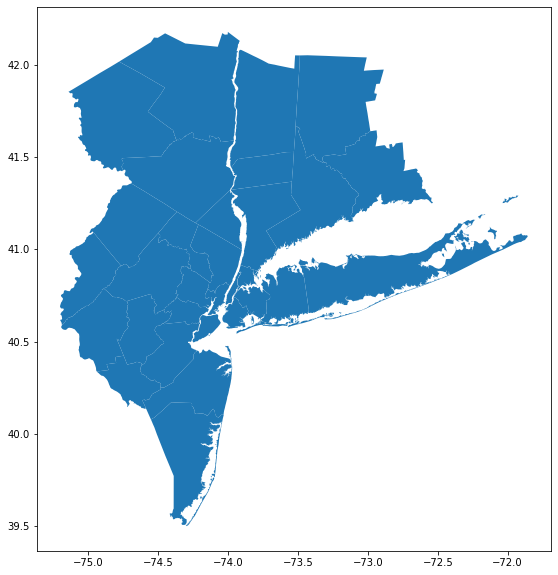

In [35]:
#plot the county boundary
tracts.plot(figsize=(12,10))

In [36]:
#map changing of housing units in the value category of more than $1,000,000 by merging the dataframe with county boundary dataframe
cbtop1m=tracts.merge(temp,on="FIPS")
cbtop1m.head()

cartodb_id statefp countyfp  geoid                         name subregid  \
0          10      34      025  34025  Monmouth County, New Jersey      ONJ   
1          25      36      081  36081      Queens County, New York      NYC   
2          19      36      027  36027    Dutchess County, New York      MHV   
3          27      36      087  36087    Rockland County, New York      LHV   
4          21      36      059  36059      Nassau County, New York       LI   

      atotal      aland  pop_10e  pop_10m  ...  iscomnycwo  \
0  665.31546  468.40775   630380        0  ...           1   
1  178.03032  108.76805  2230722        0  ...           1   
2  825.34308  795.63519   297488        0  ...           1   
3  199.33864  173.50381   311687        0  ...           1   
4  453.47308  284.80991  1339532        0  ...           1   

                                            geometry   FIPS  \
0  MULTIPOLYGON (((-73.99367 40.23651, -73.99377 ...  34025   
1  MULTIPOLYGON (((-73.83039 40.60801, -73.83033 ...  36081   
2  POLYGON ((-73.48731 42.04964, -73.48731 42.049...  36027   
3  POLYGON ((-73.90268 40.99730, -73.90268 40.997...  36087   
4  MULTIPOLYGON (((-73.61637 40.59684, -73.61620 ...  36059   

                Value                         Name  count1  year1  count2  \
0  $1,000,000 or more  Monmouth County, New Jersey    8041   2014    9055   
1  $1,000,000 or more      Queens County, New York    9148   2014   23778   
2  $1,000,000 or more    Dutchess County, New York    1271   2014    1024   
3  $1,000,000 or more    Rockland County, New York    1693   2014    1980   
4  $1,000,000 or more      Nassau County, New York   24957   2014   30450   

   year2    change  
0   2018  0.111982  
1   2018  0.615275  
2   2018 -0.241211  
3   2018  0.144949  
4   2018  0.180394  

[5 rows x 230 columns]

Text(0.5, 1.0, 'percent change of number of housing units that are over $1m')

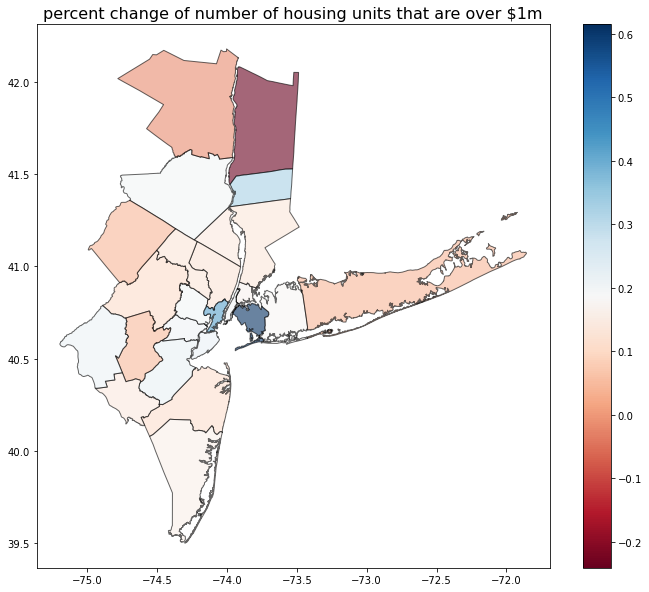

In [37]:
#plot it
figtop1m=cbtop1m.plot(figsize=(12,10),
    cmap='RdBu',
    column='change',
    legend = True,
    edgecolor='Black',
    alpha=0.6)
    
plt.title('percent change of number of housing units that are over $1m',fontsize=16)

In [38]:
#map changing of housing units in the value category between $500,000 to $999,999 by merging the dataframe with county boundary dataframe
cbtophalf=tracts.merge(temp2,on="FIPS")
cbtop1m.head()

cartodb_id statefp countyfp  geoid                         name subregid  \
0          10      34      025  34025  Monmouth County, New Jersey      ONJ   
1          25      36      081  36081      Queens County, New York      NYC   
2          19      36      027  36027    Dutchess County, New York      MHV   
3          27      36      087  36087    Rockland County, New York      LHV   
4          21      36      059  36059      Nassau County, New York       LI   

      atotal      aland  pop_10e  pop_10m  ...  iscomnycwo  \
0  665.31546  468.40775   630380        0  ...           1   
1  178.03032  108.76805  2230722        0  ...           1   
2  825.34308  795.63519   297488        0  ...           1   
3  199.33864  173.50381   311687        0  ...           1   
4  453.47308  284.80991  1339532        0  ...           1   

                                            geometry   FIPS  \
0  MULTIPOLYGON (((-73.99367 40.23651, -73.99377 ...  34025   
1  MULTIPOLYGON (((-73.83039 40.60801, -73.83033 ...  36081   
2  POLYGON ((-73.48731 42.04964, -73.48731 42.049...  36027   
3  POLYGON ((-73.90268 40.99730, -73.90268 40.997...  36087   
4  MULTIPOLYGON (((-73.61637 40.59684, -73.61620 ...  36059   

                Value                         Name  count1  year1  count2  \
0  $1,000,000 or more  Monmouth County, New Jersey    8041   2014    9055   
1  $1,000,000 or more      Queens County, New York    9148   2014   23778   
2  $1,000,000 or more    Dutchess County, New York    1271   2014    1024   
3  $1,000,000 or more    Rockland County, New York    1693   2014    1980   
4  $1,000,000 or more      Nassau County, New York   24957   2014   30450   

   year2    change  
0   2018  0.111982  
1   2018  0.615275  
2   2018 -0.241211  
3   2018  0.144949  
4   2018  0.180394  

[5 rows x 230 columns]

Text(0.5, 1.0, 'percent change of number of housing units that are between $0.5mil to 1mil')

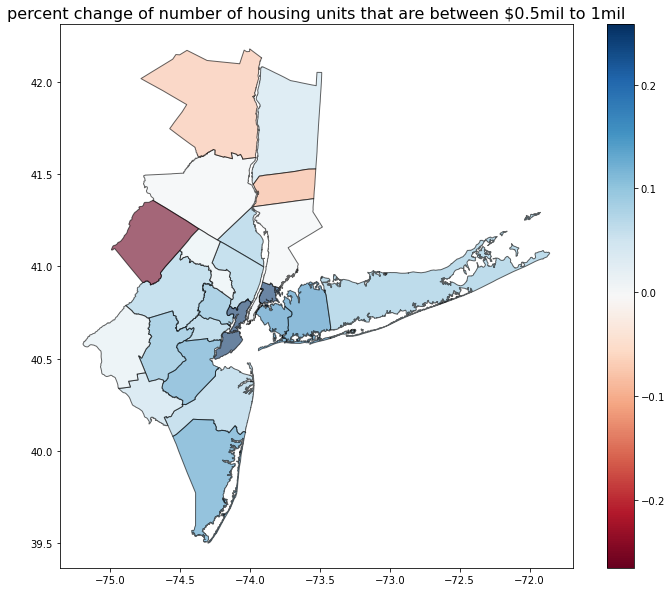

In [39]:
figtophalf=cbtophalf.plot(figsize=(12,10),
    cmap='RdBu',
    column='change',
    legend = True,
    edgecolor='Black',
    alpha=0.6)
    
plt.title('percent change of number of housing units that are between $0.5mil to 1mil',fontsize=16)

In [40]:
cbtop3to5=tracts.merge(temp3,on="FIPS")
cbtop3to5.head()

cartodb_id statefp countyfp  geoid                         name subregid  \
0          10      34      025  34025  Monmouth County, New Jersey      ONJ   
1          25      36      081  36081      Queens County, New York      NYC   
2          19      36      027  36027    Dutchess County, New York      MHV   
3          27      36      087  36087    Rockland County, New York      LHV   
4          21      36      059  36059      Nassau County, New York       LI   

      atotal      aland  pop_10e  pop_10m  ...  iscomnycwo  \
0  665.31546  468.40775   630380        0  ...           1   
1  178.03032  108.76805  2230722        0  ...           1   
2  825.34308  795.63519   297488        0  ...           1   
3  199.33864  173.50381   311687        0  ...           1   
4  453.47308  284.80991  1339532        0  ...           1   

                                            geometry   FIPS  \
0  MULTIPOLYGON (((-73.99367 40.23651, -73.99377 ...  34025   
1  MULTIPOLYGON (((-73.83039 40.60801, -73.83033 ...  36081   
2  POLYGON ((-73.48731 42.04964, -73.48731 42.049...  36027   
3  POLYGON ((-73.90268 40.99730, -73.90268 40.997...  36087   
4  MULTIPOLYGON (((-73.61637 40.59684, -73.61620 ...  36059   

                  Value                         Name  count1  year1  count2  \
0  $300,000 to $499,999  Monmouth County, New Jersey   68783   2014   67448   
1  $300,000 to $499,999      Queens County, New York  120386   2014  101879   
2  $300,000 to $499,999    Dutchess County, New York   25104   2014   24000   
3  $300,000 to $499,999    Rockland County, New York   33371   2014   31517   
4  $300,000 to $499,999      Nassau County, New York  175206   2014  159539   

   year2    change  
0   2018 -0.019793  
1   2018 -0.181657  
2   2018 -0.046000  
3   2018 -0.058825  
4   2018 -0.098202  

[5 rows x 230 columns]

Text(0.5, 1.0, 'percent change of number of housing units that are between $0.3mil to 0.5mil')

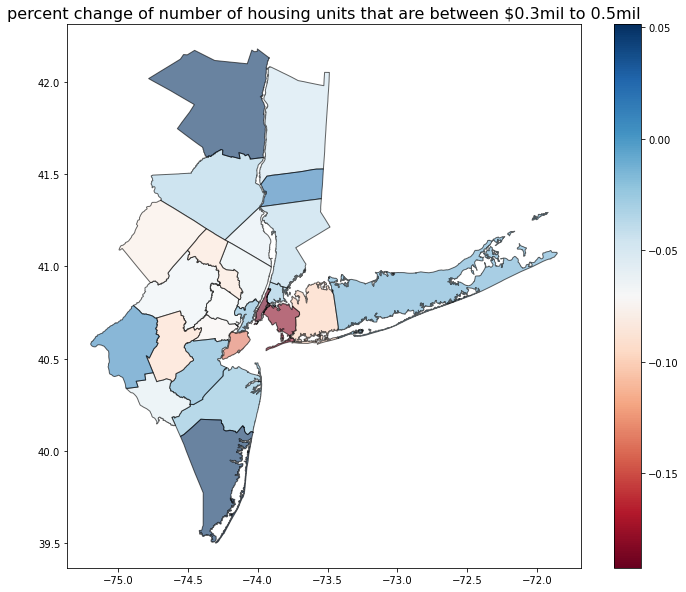

In [41]:
figtophalf=cbtop3to5.plot(figsize=(12,10),
    cmap='RdBu',
    column='change',
    legend = True,
    edgecolor='Black',
    alpha=0.6)
    
plt.title('percent change of number of housing units that are between $0.3mil to 0.5mil',fontsize=16)

## Conclusion about housing price

From the data exploration and analysis of housing value in 2014 and 2018, all counties experienced some changes in housing price. For counties close to New York County (NYC), there is an increase in housing units with higher price (higher than $500,000), and decrease in housing units with lower price (below $500,000). 

Specifically, counties near New York County (NYC) experienced  the highest increase in housing units in the more than $1 million value category. Queens county increased more than 60%, Kings county increased 53.7%, Hudson County(across from NYC) increased 41.9%, and the further aweay Putnam County increased 32.7%. 

Similar geographic pattern of increase holds true for the value category between $500,000 to $999,999. In Hudson County, which is located across from New York County (NYC), housing units between $500,000 to $999,999 increased 25.8%, Richmond County, which is located mainly in Staten Island (below NYC), units increased 25.7%, and in Bronx, which is above NYC, housing units increased 25.2%. In counties further away from New York County, there is also a significant but smaller increase in housing units in the $500,000 to $999,999 value category. 

For lower value categories, the housing units near New York County experienced an overall decine in number of units, ranging from minor to significant decrease. Kings County (Brooklyn) experienced 29.2% decrease in housing units within this value category, New York county itself experience 19.2% decrese, Queens County experience 18.2% decrease, and Richmond County experience 13.7% decrease. However, there are some counties nearby that experience a minor descrease as well. For counties further away from NYC, some experienced a minor decrease and some experienced a minor increase of housing units in this value category. 

# Conclusion on housing affordability and housing value in NYMA between 2014 and 2018
In this data exploration and analysis notebook, I conducted basic data exploration of housing affordability datasets, housing value datasets and county boundary datasets. I analyzed and mapped housing affordability anbd housing value in 2014 and 2018 across 31 counties in New York Metro Area. 
In the future weeks during this quarter, I will conduct more analysis on the impact of migration on housing price and affordability in NYMA. 